## Detecting Diabetes With Usig KNN

Importing all the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

c:\Users\Şeyma\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arrays\masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [2]:
# Loading data into a dataframe
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


When we look into dataframe we see that there is a column named Outcome. The values of the columns are, 0 to describe the patient doesn't have diabetes and 1 to describe the patient has diabetes. 

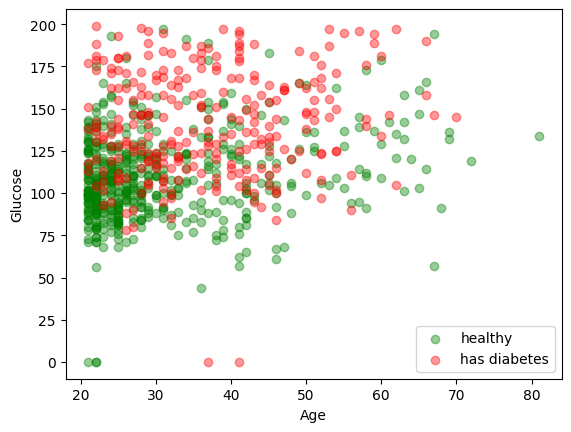

In [3]:
with_diabetes = data[data.Outcome == 1]
without_diabetes = data[data.Outcome == 0]

# Example graph for glucose level
plt.scatter(without_diabetes.Age, without_diabetes.Glucose, color='green', label='healthy', alpha=0.4)
plt.scatter(with_diabetes.Age, with_diabetes.Glucose, color='red', label='has diabetes', alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [5]:
y = data.Outcome.values
x_raw = data.drop(["Outcome"], axis=1)
# Doing normalization for the independent datas so they can have values between 0 and 1.
x = (x_raw - np.min(x_raw)) / (np.max(x_raw) - np.min(x_raw))

print(x_raw.head())
print(x.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6      148             72             35        0  33.6  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI   
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716  \
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.009456  0.216312       0.075650       0.000000  0.000000  0.027541   
3     0.001182  0.105201       0.078014      

In [18]:
# Splitting the datasets into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Deploying a model as K = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Test results for K=3: ", knn.score(x_test, y_test))

Test results for K=3:  0.7402597402597403


If we look at the results it could be better so we should change k. 

In [19]:
for k in range(1, 11):
    knn_new = KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(x_train, y_train)
    print("Results for",k,":", knn_new.score(x_test, y_test))

Results for 1 : 0.7207792207792207
Results for 2 : 0.7272727272727273
Results for 3 : 0.7402597402597403
Results for 4 : 0.7207792207792207
Results for 5 : 0.7337662337662337
Results for 6 : 0.7727272727272727
Results for 7 : 0.7597402597402597
Results for 8 : 0.7662337662337663
Results for 9 : 0.7662337662337663
Results for 10 : 0.7597402597402597


When we look at other k values and their result the heighest score is for 6. Hence we should deploy our model with 6 neighbors.

##### Prediction for a new patient

In [22]:
from sklearn.preprocessing import MinMaxScaler
 
# Normalization
sc = MinMaxScaler()
sc.fit_transform(x_raw)
 
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

1